In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
#Leer CSV
df = pd.read_csv("C:/Users/edins/OneDrive/Documentos/LAB-MAA/data/machine_failure_data.csv")
df


,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
0,12/1/2008,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,12/2/2008,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12/3/2008,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,12/4/2008,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,12/5/2008,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6/20/2017,42,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No
142189,6/21/2017,42,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
142190,6/22/2017,42,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
142191,6/23/2017,42,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No


Estadística descriptiva:

In [3]:
df.describe()

,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,24.740655,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,14.237503,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,12.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,25.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,37.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,49.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


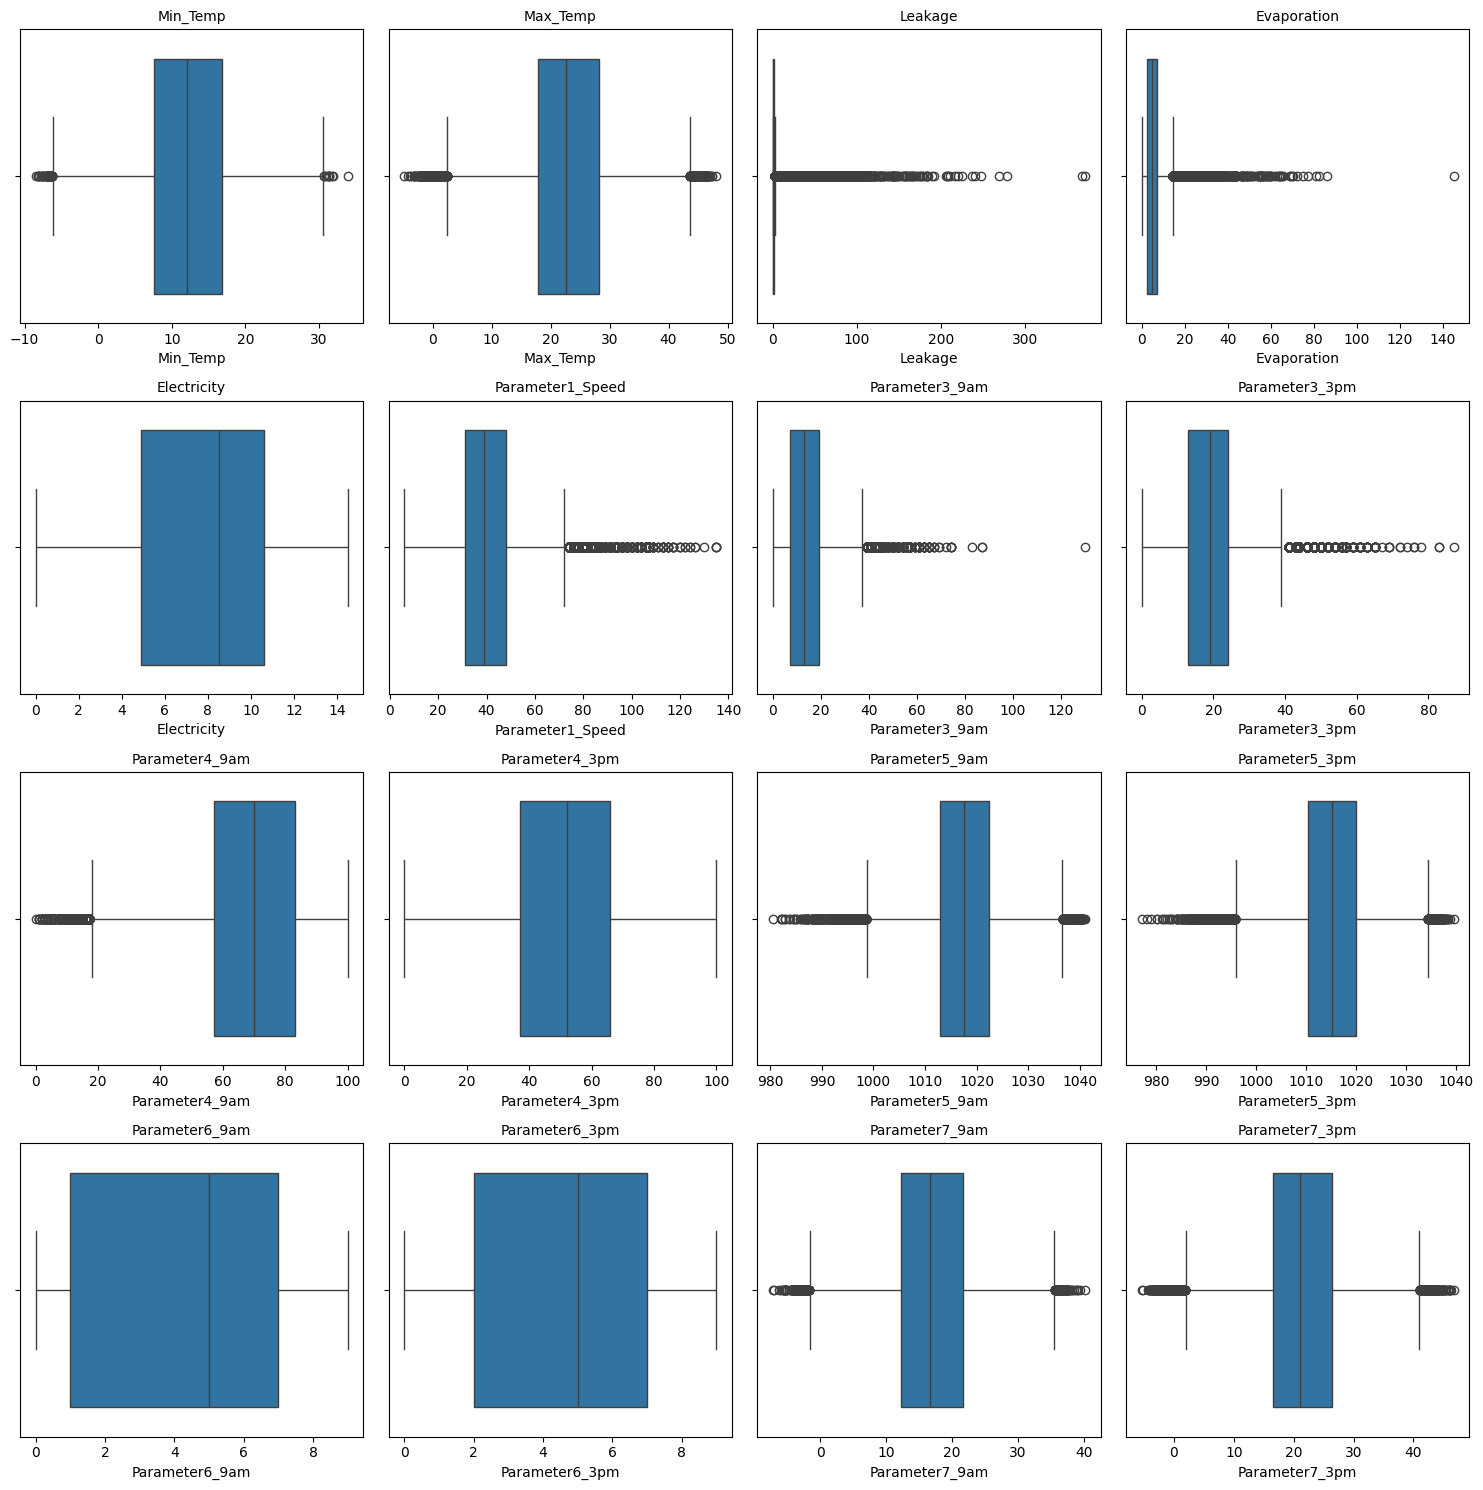

In [4]:
fig, axes = plt.subplots(4, 4,figsize=(15, 15))

sns.boxplot(x=df['Min_Temp'],data=df,ax=axes[0, 0])
axes[0, 0].set_title('Min_Temp',fontsize=10)

sns.boxplot(x=df['Max_Temp'],data=df,ax=axes[0, 1])
axes[0, 1].set_title('Max_Temp',fontsize=10)

sns.boxplot(x=df['Leakage'],data=df,ax=axes[0, 2])
axes[0, 2].set_title('Leakage',fontsize=10)

sns.boxplot(x=df['Evaporation'],data=df,ax=axes[0, 3])
axes[0, 3].set_title('Evaporation',fontsize=10)

sns.boxplot(x=df['Electricity'],data=df,ax=axes[1, 0])
axes[1, 0].set_title('Electricity',fontsize=10)

sns.boxplot(x=df['Parameter1_Speed'],data=df,ax=axes[1, 1])
axes[1, 1].set_title('Parameter1_Speed',fontsize=10)

sns.boxplot(x=df['Parameter3_9am'],data=df,ax=axes[1, 2])
axes[1, 2].set_title('Parameter3_9am',fontsize=10)

sns.boxplot(x=df['Parameter3_3pm'],data=df,ax=axes[1, 3])
axes[1, 3].set_title('Parameter3_3pm',fontsize=10)

sns.boxplot(x=df['Parameter4_9am'],data=df,ax=axes[2, 0])
axes[2, 0].set_title('Parameter4_9am',fontsize=10)

sns.boxplot(x=df['Parameter4_3pm'],data=df,ax=axes[2, 1])
axes[2, 1].set_title('Parameter4_3pm',fontsize=10)

sns.boxplot(x=df['Parameter5_9am'],data=df,ax=axes[2, 2])
axes[2, 2].set_title('Parameter5_9am',fontsize=10)

sns.boxplot(x=df['Parameter5_3pm'],data=df,ax=axes[2, 3])
axes[2, 3].set_title('Parameter5_3pm',fontsize=10)

sns.boxplot(x=df['Parameter6_9am'],data=df,ax=axes[3, 0])
axes[3, 0].set_title('Parameter6_9am',fontsize=10)

sns.boxplot(x=df['Parameter6_3pm'],data=df,ax=axes[3, 1])
axes[3, 1].set_title('Parameter6_3pm',fontsize=10)

sns.boxplot(x=df['Parameter7_9am'],data=df,ax=axes[3, 2])
axes[3, 2].set_title('Parameter7_9am',fontsize=10)

sns.boxplot(x=df['Parameter7_3pm'],data=df,ax=axes[3, 3])
axes[3, 3].set_title('Parameter7_3pm',fontsize=10)

plt.tight_layout()
plt.show()

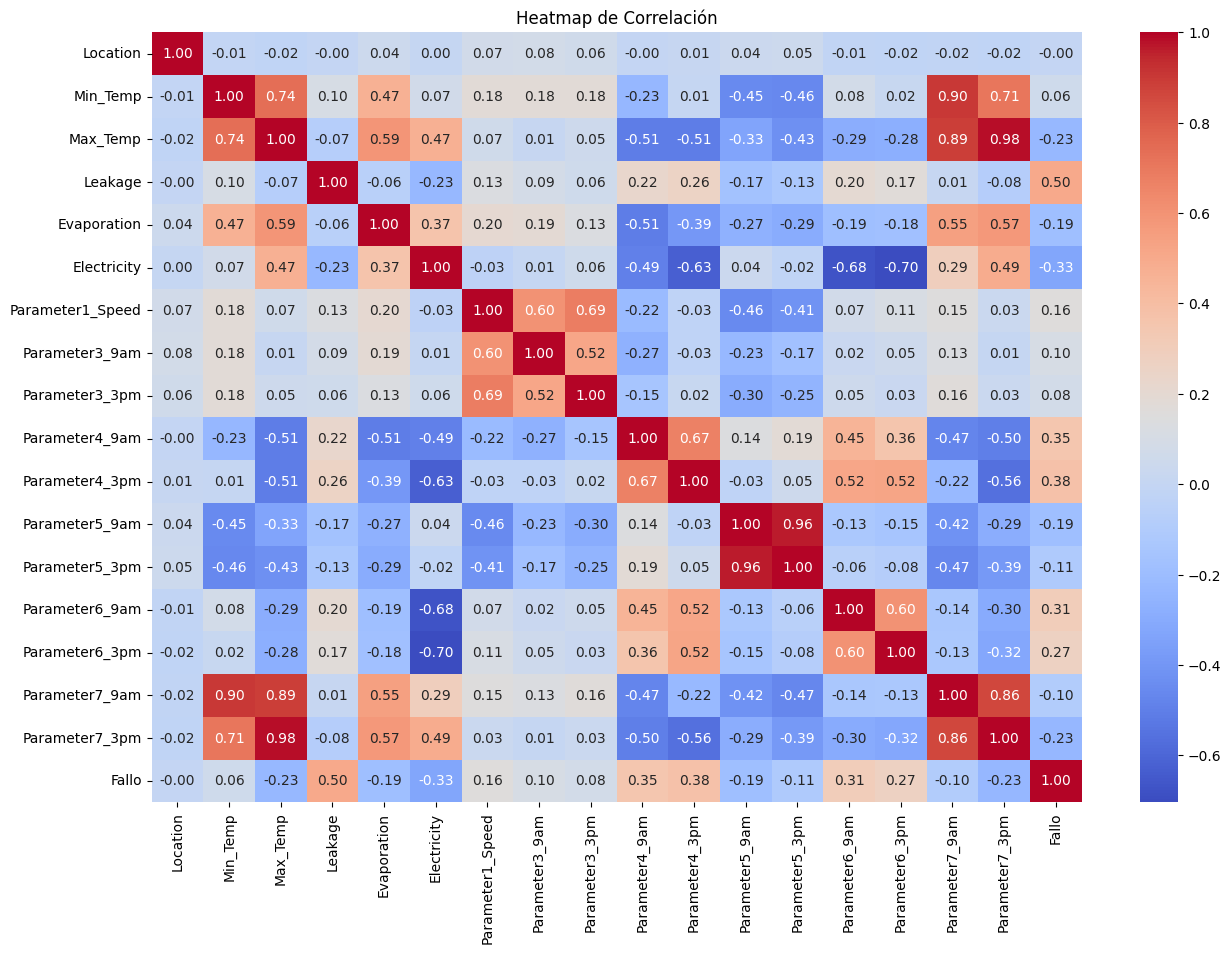

In [5]:
df_numerico = df.select_dtypes(include='number')
df_numerico['Fallo'] = df['Failure_today'].map({'Yes': 1, 'No': 0})
corr = df_numerico.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlación')
plt.show()

Podemos observar que Leakage esta altamente relacionado a la variable Fallo, por lo que se concluirá que es sobre explicativa

Limpieza de datos:

In [6]:
#vemos cuantos NaN hay
df.isnull().sum().sum()

np.int64(316559)

Vemos que existen muchos valores NaN (316 559), pero al aplicar .dropna() se nos elimina más de la mitad del DataFrame, por lo que la presencia de NaN podría estar relacionada con la variable de fallo. Se proseguira de la siguiente forma:

In [7]:
#Calculamos el porcentaje de NaN por columna

porcentaje_nan = (df.isnull().sum() / len(df)) * 100
porcentaje_nan = porcentaje_nan[porcentaje_nan > 0].sort_values(ascending=False)
print(porcentaje_nan)

Electricity         47.692924
Evaporation         42.789026
Parameter6_3pm      40.152469
Parameter6_9am      37.735332
Parameter5_9am       9.855619
Parameter5_3pm       9.832411
Parameter2_9am       7.041838
Parameter1_Dir       6.561504
Parameter1_Speed     6.519308
Parameter2_3pm       2.656952
Parameter4_3pm       2.538803
Parameter7_3pm       1.917113
Parameter3_3pm       1.849599
Parameter4_9am       1.247600
Leakage              0.988797
Failure_today        0.988797
Parameter3_9am       0.948007
Parameter7_9am       0.635756
Min_Temp             0.447983
Max_Temp             0.226453
dtype: float64


Las columnas con mayor porcentaje de NaN son Electricity, Evaporation, Parameter6_3pm y Parameter6_9am. Transformamos estas variables a binarias (0 = variable no se midió (NaN) , 1 = variable se midió) para luego aplicar .dropna()

In [8]:
data = df
data['Electricity'] = data['Electricity'].notnull().astype(int)
data['Evaporation'] = data['Evaporation'].notnull().astype(int)
data['Parameter6_3pm'] = data['Parameter6_3pm'].notnull().astype(int)
data['Parameter6_9am'] = data['Parameter6_9am'].notnull().astype(int)
data =data.dropna()
data

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
0,12/1/2008,3,13.4,22.9,0.6,0,0,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,1,0,16.9,21.8,No
1,12/2/2008,3,7.4,25.1,0.0,0,0,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,0,0,17.2,24.3,No
2,12/3/2008,3,12.9,25.7,0.0,0,0,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,0,1,21.0,23.2,No
3,12/4/2008,3,9.2,28.0,0.0,0,0,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,0,0,18.1,26.5,No
4,12/5/2008,3,17.5,32.3,1.0,0,0,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,1,1,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6/20/2017,42,3.5,21.8,0.0,0,0,E,31.0,ESE,...,13.0,59.0,27.0,1024.7,1021.2,0,0,9.4,20.9,No
142189,6/21/2017,42,2.8,23.4,0.0,0,0,E,31.0,SE,...,11.0,51.0,24.0,1024.6,1020.3,0,0,10.1,22.4,No
142190,6/22/2017,42,3.6,25.3,0.0,0,0,NNW,22.0,SE,...,9.0,56.0,21.0,1023.5,1019.1,0,0,10.9,24.5,No
142191,6/23/2017,42,5.4,26.9,0.0,0,0,N,37.0,SE,...,9.0,53.0,24.0,1021.0,1016.8,0,0,12.5,26.1,No


In [9]:

data['Fallo'] = data['Failure_today'].map({'Yes': 1, 'No': 0})
data['mes'] = pd.to_datetime(data['Date'], format='%m/%d/%Y').dt.month #extraemos el mes 
data['Estacion'] = data['mes'].map({1:'I',2:'I',3:'I',4:'P',5:'P',6:'P',7:'V',8:'V',9:'V',10:'O',11:'O',12:'O'}) #mapeamos numero de mes a estacion

data = pd.get_dummies(data,columns=['Estacion'],drop_first=True,dtype=int)
data['Parametro1_Dir']=data['Parameter1_Dir'].map({'NW':'N','NNW':'N','N':'N','NNE':'N','NE':'N','ENE':'E','E':'E','ESE':'E','SE':'S',
                                                   'SSE':'S','S':'S','SSW':'S','SW':'S','WSW':'W','W':'W','WNW':'W'})
data = pd.get_dummies(data,columns=['Parametro1_Dir'],drop_first=True,dtype=int)
data['Parametro2_9am']=data['Parameter2_9am'].map({'NW':'N','NNW':'N','N':'N','NNE':'N','NE':'N','ENE':'E','E':'E','ESE':'E','SE':'S',
                                                   'SSE':'S','S':'S','SSW':'S','SW':'S','WSW':'W','W':'W','WNW':'W'})
data = pd.get_dummies(data,columns=['Parametro2_9am'],drop_first=True,dtype=int)
data['Parametro2_3pm']=data['Parameter2_3pm'].map({'NW':'N','NNW':'N','N':'N','NNE':'N','NE':'N','ENE':'E','E':'E','ESE':'E','SE':'S',
                                                   'SSE':'S','S':'S','SSW':'S','SW':'S','WSW':'W','W':'W','WNW':'W'})
data = pd.get_dummies(data,columns=['Parametro2_3pm'],drop_first=True,dtype=int)

data = pd.get_dummies(data, columns=['Location'], prefix='loc', drop_first=True, dtype=int)

data 

C:\Users\edins\AppData\Local\Temp\ipykernel_12548\1657808883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fallo'] = data['Failure_today'].map({'Yes': 1, 'No': 0})
C:\Users\edins\AppData\Local\Temp\ipykernel_12548\1657808883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mes'] = pd.to_datetime(data['Date'], format='%m/%d/%Y').dt.month #extraemos el mes
C:\Users\edins\AppData\Local\Temp\ipykernel_12548\1657808883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Date,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,Parameter2_3pm,...,loc_40,loc_41,loc_42,loc_43,loc_44,loc_45,loc_46,loc_47,loc_48,loc_49
0,12/1/2008,13.4,22.9,0.6,0,0,W,44.0,W,WNW,...,0,0,0,0,0,0,0,0,0,0
1,12/2/2008,7.4,25.1,0.0,0,0,WNW,44.0,NNW,WSW,...,0,0,0,0,0,0,0,0,0,0
2,12/3/2008,12.9,25.7,0.0,0,0,WSW,46.0,W,WSW,...,0,0,0,0,0,0,0,0,0,0
3,12/4/2008,9.2,28.0,0.0,0,0,NE,24.0,SE,E,...,0,0,0,0,0,0,0,0,0,0
4,12/5/2008,17.5,32.3,1.0,0,0,W,41.0,ENE,NW,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6/20/2017,3.5,21.8,0.0,0,0,E,31.0,ESE,E,...,0,0,1,0,0,0,0,0,0,0
142189,6/21/2017,2.8,23.4,0.0,0,0,E,31.0,SE,ENE,...,0,0,1,0,0,0,0,0,0,0
142190,6/22/2017,3.6,25.3,0.0,0,0,NNW,22.0,SE,N,...,0,0,1,0,0,0,0,0,0,0
142191,6/23/2017,5.4,26.9,0.0,0,0,N,37.0,SE,WNW,...,0,0,1,0,0,0,0,0,0,0


2. Regresion OLS

In [11]:
y = data['Fallo']
X = data.drop(['Fallo','Failure_today','Leakage', 'Date', 'mes','Parameter1_Dir','Parameter2_9am','Parameter2_3pm'], axis=1) 
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit(cov_type='HC0')
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Fallo   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     718.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:53:56   Log-Likelihood:                -41295.
No. Observations:              112925   AIC:                         8.273e+04
Df Residuals:                  112854   BIC:                         8.342e+04
Df Model:                          70                                         
Covariance Type:                  HC0                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.8297      0.226  

3. Probit

In [12]:
model = sm.Probit(y, X)
probit_model = model.fit(cov_type='HC0')
print(probit_model.summary())

mfxp = probit_model.get_margeff()
print(mfxp.summary())

Optimization terminated successfully.
         Current function value: 0.352421
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                  Fallo   No. Observations:               112925
Model:                         Probit   Df Residuals:                   112854
Method:                           MLE   Df Model:                           70
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3385
Time:                        22:53:57   Log-Likelihood:                -39797.
converged:                       True   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               28.1011      1.004     27.987      0.000      26.133      30.069
Min_Temp   

4. Logit

In [ ]:
model = sm.Logit(y, X)
logit_model = model.fit(cov_type='HC0')
print(logit_model.summary())

mfxl = logit_model.get_margeff()
print(mfxl.summary())


Optimization terminated successfully.
         Current function value: 0.351250
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Fallo   No. Observations:               112925
Model:                          Logit   Df Residuals:                   112854
Method:                           MLE   Df Model:                           70
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3407
Time:                        22:54:05   Log-Likelihood:                -39665.
converged:                       True   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               48.6035      1.772     27.426      0.000      45.130      52.077
Min_Temp   

5. Al ser la variable dependiente una variable dicotómica, los modelos de Probit y Logit entregan resultados más adecuados. Además, los valores de log-likelihood y de R2 son más relevantes en estos modelos por lo que se ajustan mejor al problema. Max Temp y Electricity destacan como variables significativas.

6. Agrupacion por mes-año:

In [22]:
df1 = df

#volvemos a limpiar los NaN como se hizo antes: 
df1['Electricity'] = df1['Electricity'].notnull().astype(int)
df1['Evaporation'] = df1['Evaporation'].notnull().astype(int)
df1['Parameter6_3pm'] = df1['Parameter6_3pm'].notnull().astype(int)
df1['Parameter6_9am'] = df1['Parameter6_9am'].notnull().astype(int)
df1 =df1.dropna()
df1
#volvemos a mapear fallo y transformamos fecha a datetime
df1['Fallo'] = df['Failure_today'].map({'Yes': 1, 'No': 0})
df1['Date'] = pd.to_datetime(df1['Date'])

df1['año_mes'] = df1['Date'].dt.to_period('M')

df2 = df1.groupby(['Location', 'año_mes']).agg({     
    'Min_Temp' : 'mean', 
    'Max_Temp':'mean',      
    'Leakage': 'mean', 
    'Evaporation': lambda x: (x == 1).sum() ,
    'Electricity':lambda x: (x == 1).sum() ,
    'Parameter1_Speed': 'mean',
    'Parameter3_9am' :'mean',
    'Parameter3_3pm' :'mean',
    'Parameter4_9am' :'mean',
    'Parameter4_3pm' :'mean',
    'Parameter5_9am' :'mean',
    'Parameter5_3pm' :'mean',
    'Parameter6_9am' :'mean',
    'Parameter6_3pm' :'mean',
    'Parameter7_9am' :'mean',
    'Parameter7_3pm' :'mean',
    'Fallo': lambda x: (x == 1).sum() 
}).reset_index()

C:\Users\edins\AppData\Local\Temp\ipykernel_12548\3691603292.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fallo'] = df['Failure_today'].map({'Yes': 1, 'No': 0})
C:\Users\edins\AppData\Local\Temp\ipykernel_12548\3691603292.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\edins\AppData\Local\Temp\ipykernel_12548\3691603292.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [23]:
df2

,Location,año_mes,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Fallo
0,1,2008-07,7.000000,14.550000,3.530000,20,20,39.450000,11.950000,16.250000,73.300000,58.800000,1020.545000,1019.020000,1.0,1.0,10.795000,13.615000,10
1,1,2008-08,5.936842,14.600000,4.242105,19,19,36.105263,9.315789,15.631579,74.947368,58.000000,1026.763158,1025.205263,1.0,1.0,9.973684,13.484211,10
2,1,2008-09,9.461538,20.234615,0.615385,26,26,39.846154,14.730769,17.807692,51.423077,37.115385,1019.834615,1017.573077,1.0,1.0,15.188462,19.211538,4
3,1,2008-10,12.383333,25.045833,0.200000,24,24,37.291667,11.875000,17.458333,45.125000,29.958333,1020.979167,1018.900000,1.0,1.0,17.933333,23.941667,2
4,1,2008-11,14.210714,24.642857,0.492857,28,28,42.142857,12.607143,18.678571,52.678571,35.428571,1012.867857,1011.203571,1.0,1.0,18.492857,23.110714,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,49,2017-02,19.546429,34.232143,0.000000,28,28,46.464286,23.178571,20.928571,49.964286,24.285714,1013.971429,1011.989286,1.0,1.0,23.560714,32.203571,0
4133,49,2017-03,18.745161,33.732258,0.000000,31,31,43.612903,20.387097,18.419355,49.387097,21.806452,1014.780645,1012.367742,1.0,1.0,22.170968,32.074194,0
4134,49,2017-04,13.572414,24.796552,1.403448,29,29,35.758621,18.586207,17.172414,56.034483,38.379310,1022.668966,1019.606897,1.0,1.0,18.596552,23.644828,4
4135,49,2017-05,9.277419,20.938710,0.341935,31,31,33.580645,14.741935,17.290323,65.258065,37.677419,1022.958065,1020.187097,1.0,1.0,13.806452,20.267742,1


Poisson:

In [24]:
y = df2['Fallo']
X1 = df2.drop(['Fallo','año_mes','Leakage','Parameter6_9am','Parameter6_3pm'], axis=1)
poisson=sm.GLM(y,X1,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Fallo   No. Observations:                 4137
Model:                            GLM   Df Residuals:                     4124
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9318.7
Date:               jue, 24 abr. 2025   Deviance:                       4898.1
Time:                        23:36:44   Pearson chi2:                 4.37e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8490
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Location            -0.0029      0.000  

7. Sobredispersión y valor alpha:

In [25]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Fallo   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              6.489
Date:               jue, 24 abr. 2025   Prob (F-statistic):                      0.0109
Time:                        23:36:49   Log-Likelihood:                         -7419.9
No. Observations:                4137   AIC:                                  1.484e+04
Df Residuals:                    4136   BIC:                                  1.485e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
alfa = np.exp(auxr.params[0])
print(alfa)

1.0081757831083749


C:\Users\edins\AppData\Local\Temp\ipykernel_12548\2180082010.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alfa = np.exp(auxr.params[0])


Dado que Alfa = 1.008 , existe una sobredispersión moderada

8. Binomial Negativa

In [27]:
negbin=sm.GLM(y,X1,family=sm.families.NegativeBinomial(alpha=alfa)).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Fallo   No. Observations:                 4137
Model:                            GLM   Df Residuals:                     4124
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11350.
Date:               jue, 24 abr. 2025   Deviance:                       1154.4
Time:                        23:37:31   Pearson chi2:                     804.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2584
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Location            -0.0030      0.001  

9. Ambos modelos entregan coeficientes similares, sin embargo, se podría interpretar que el modelo de binomial negativa entrega un mejor resultado al tener en cuenta el alpha y la sobre dispersion. Muchas variables resultaron ser robustas para el modelo, tales como Evaporation, Electricity o Parameter 1 pues muestran una alta significancia sobre la variable de fallo.